# Pendahuluan Neural Network
<br><br>
<img src="images/neural network.jpg"  style="width: 800px;" />

image source: https://medium.com/@samuelsena/pengenalan-deep-learning-8fbb7d8028ac

## Sejarah

<img src="images/sejarah NN.jpg"/>

image source: https://www.linkedin.com/pulse/history-neural-networks-datta-dharanikota/


## Penerapan Neural Network

<img src="images/aplikasi NN.png" style="width: 800px"/>

image source: https://www.youtube.com/watch?v=bfmFfD2RIcg
<br><br>
- Reface App Manfaatkan Deep Tech AI: https://aqi.co.id/blog/yang-sedang-viral-reface-app-swap-wajah-dengan-teknologi-ai
<br><br>
<div style="text-align: center">
    <video align="center" controls src="videos/Reface App.mp4" width="700" >
<div/>


<img src="images/pros and cons.jpeg" style="width: 800px"/>

image source: https://slidetodoc.com/neural-networks-and-support-vector-machines-outline-neural/

## Konsep Neural Network

<img src="images/neural network 1.jpg"  style="width: 600px;" />

- Terdapat beberapa *activation function*, di antaranya sebagai berikut:
<img src="images/activation functions.jpg" width=500 height=500/>

image source: https://docs.paperspace.com/machine-learning/wiki/activation-function

- Struktur dasar NN

<img alt="" src="images/struktur neural network.JPG" style="width: 400px;" />

## Contoh sistem kerja Neural Network
link: https://youtu.be/o20mBWPHGEw

<div style="text-align: center">
    <video align="center" controls src="videos/neural network.mp4" width="560" height="315">

## Neural Network menggunakan Tensorflow dan Keras
- tensorflow: https://www.tensorflow.org/overview
- keras: https://keras.io/about/

In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Dataset Harga Rumah
# link: https://www.kaggle.com/wisnuanggara/daftar-harga-rumah?select=DATA+RUMAH.xlsx


# Convert ke Pandas Dataframe
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


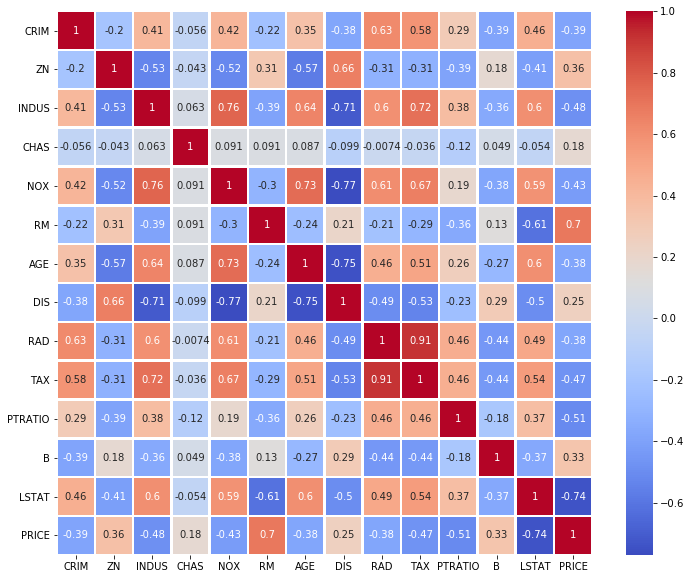

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(bos.corr(), linewidths=1.5, linecolor='white', cmap='coolwarm', annot=True)

In [ ]:
# Deskripsi Data
# print(boston.DESCR)

In [8]:
bos.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
X = bos.drop(columns=['PRICE'])
y = bos['PRICE']

# Check the shape of training data
print(X.shape,y.shape)

(506, 13) (506,)


In [11]:
# Create training and test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# Set up the network

model = Sequential()
model.add(Dense(68, input_dim=13, activation='relu'))      # First Hidden Layer with relu activation function
model.add(Dense(32, activation='relu'))                    # Second Hidden Layer with relu activation function
model.add(Dense(1, activation='linear'))                   # Output Layer without or linear activation function 

# Configure the network with optimizer and loss function

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 68)                952       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2208      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 3,193
Trainable params: 3,193
Non-trainable params: 0
_________________________________________________________________


In [15]:
# fit the model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train, y_train, 
                    epochs=1000,
                    validation_split=0.1, verbose=1,
                    callbacks=[early_stop])

Epoch 1/1000
10/10 [==============================] - 2s 125ms/step - loss: 2302.9637 - mae: 40.2912 - val_loss: 916.1979 - val_mae: 26.3878
Epoch 2/1000
10/10 [==============================] - 0s 7ms/step - loss: 538.3100 - mae: 18.1452 - val_loss: 221.2958 - val_mae: 13.4091
Epoch 3/1000
10/10 [==============================] - 0s 7ms/step - loss: 260.5744 - mae: 13.2117 - val_loss: 111.0958 - val_mae: 8.1950
Epoch 4/1000
10/10 [==============================] - 0s 7ms/step - loss: 144.8994 - mae: 9.2048 - val_loss: 71.9658 - val_mae: 6.8939
Epoch 5/1000
10/10 [==============================] - 0s 7ms/step - loss: 88.2798 - mae: 7.4548 - val_loss: 57.0595 - val_mae: 6.2377
Epoch 6/1000
10/10 [==============================] - 0s 7ms/step - loss: 73.2927 - mae: 6.2047 - val_loss: 57.6009 - val_mae: 6.3280
Epoch 7/1000
10/10 [==============================] - 0s 7ms/step - loss: 65.0874 - mae: 6.1793 - val_loss: 62.1896 - val_mae: 6.6214
Epoch 8/1000
10/10 [===========================

10/10 [==============================] - 0s 7ms/step - loss: 38.1790 - mae: 4.2448 - val_loss: 23.7757 - val_mae: 4.2896
Epoch 62/1000
10/10 [==============================] - 0s 7ms/step - loss: 31.2352 - mae: 3.9912 - val_loss: 27.5223 - val_mae: 4.6246
Epoch 63/1000
10/10 [==============================] - 0s 8ms/step - loss: 39.2579 - mae: 4.4103 - val_loss: 27.7079 - val_mae: 4.6337
Epoch 64/1000
10/10 [==============================] - 0s 8ms/step - loss: 38.3776 - mae: 4.5731 - val_loss: 19.8067 - val_mae: 3.8238
Epoch 65/1000
10/10 [==============================] - 0s 8ms/step - loss: 45.0899 - mae: 4.8826 - val_loss: 20.3377 - val_mae: 3.8541
Epoch 66/1000
10/10 [==============================] - 0s 7ms/step - loss: 42.4574 - mae: 4.7340 - val_loss: 25.6896 - val_mae: 4.4776
Epoch 67/1000
10/10 [==============================] - 0s 7ms/step - loss: 39.0417 - mae: 4.7606 - val_loss: 22.1626 - val_mae: 4.1429
Epoch 68/1000
10/10 [==============================] - 0s 7ms/step - 

10/10 [==============================] - 0s 10ms/step - loss: 26.4945 - mae: 3.8314 - val_loss: 17.8656 - val_mae: 3.6268
Epoch 122/1000
10/10 [==============================] - 0s 11ms/step - loss: 31.1618 - mae: 3.9152 - val_loss: 17.1080 - val_mae: 3.5849
Epoch 123/1000
10/10 [==============================] - 0s 9ms/step - loss: 27.4846 - mae: 3.7843 - val_loss: 18.8045 - val_mae: 3.7260
Epoch 124/1000
10/10 [==============================] - 0s 9ms/step - loss: 37.3411 - mae: 4.2958 - val_loss: 16.3384 - val_mae: 3.4713
Epoch 125/1000
10/10 [==============================] - 0s 13ms/step - loss: 29.3199 - mae: 3.8916 - val_loss: 20.0725 - val_mae: 3.8549
Epoch 126/1000
10/10 [==============================] - 0s 11ms/step - loss: 31.5230 - mae: 4.1029 - val_loss: 16.3665 - val_mae: 3.4134
Epoch 127/1000
10/10 [==============================] - 0s 10ms/step - loss: 29.8386 - mae: 4.0145 - val_loss: 22.9318 - val_mae: 4.0385
Epoch 128/1000
10/10 [==============================] - 0s

10/10 [==============================] - 0s 6ms/step - loss: 29.0997 - mae: 3.9890 - val_loss: 21.0694 - val_mae: 3.7282
Epoch 182/1000
10/10 [==============================] - 0s 6ms/step - loss: 31.8642 - mae: 4.3130 - val_loss: 16.0421 - val_mae: 3.1052
Epoch 183/1000
10/10 [==============================] - 0s 6ms/step - loss: 32.2924 - mae: 4.1078 - val_loss: 14.1833 - val_mae: 3.1290
Epoch 184/1000
10/10 [==============================] - 0s 16ms/step - loss: 28.6970 - mae: 3.9785 - val_loss: 21.4037 - val_mae: 3.8276
Epoch 185/1000
10/10 [==============================] - 0s 6ms/step - loss: 27.8742 - mae: 4.0768 - val_loss: 21.0724 - val_mae: 3.7502
Epoch 186/1000
10/10 [==============================] - 0s 6ms/step - loss: 26.8358 - mae: 3.6516 - val_loss: 15.0005 - val_mae: 3.1834
Epoch 187/1000
10/10 [==============================] - 0s 5ms/step - loss: 25.9117 - mae: 3.6434 - val_loss: 14.2460 - val_mae: 3.0551
Epoch 188/1000
10/10 [==============================] - 0s 6ms

10/10 [==============================] - 0s 6ms/step - loss: 33.8604 - mae: 4.6569 - val_loss: 14.8149 - val_mae: 3.2298
Epoch 242/1000
10/10 [==============================] - 0s 6ms/step - loss: 33.0531 - mae: 4.0856 - val_loss: 13.7137 - val_mae: 3.0195
Epoch 243/1000
10/10 [==============================] - 0s 6ms/step - loss: 28.2983 - mae: 3.9633 - val_loss: 28.0548 - val_mae: 4.5091
Epoch 244/1000
10/10 [==============================] - 0s 6ms/step - loss: 26.6641 - mae: 3.9690 - val_loss: 18.7780 - val_mae: 3.6321
Epoch 245/1000
10/10 [==============================] - 0s 8ms/step - loss: 19.0100 - mae: 3.2145 - val_loss: 13.4407 - val_mae: 2.8308
Epoch 246/1000
10/10 [==============================] - 0s 7ms/step - loss: 25.6401 - mae: 3.6675 - val_loss: 11.9275 - val_mae: 2.6788
Epoch 247/1000
10/10 [==============================] - 0s 7ms/step - loss: 28.2362 - mae: 3.7665 - val_loss: 32.1251 - val_mae: 4.6528
Epoch 248/1000
10/10 [==============================] - 0s 7ms/

10/10 [==============================] - 0s 7ms/step - loss: 29.2655 - mae: 4.2601 - val_loss: 33.8791 - val_mae: 5.0117
Epoch 302/1000
10/10 [==============================] - 0s 6ms/step - loss: 30.3651 - mae: 4.2659 - val_loss: 20.8150 - val_mae: 3.3403
Epoch 303/1000
10/10 [==============================] - 0s 5ms/step - loss: 25.4836 - mae: 3.8834 - val_loss: 15.4509 - val_mae: 3.1129
Epoch 304/1000
10/10 [==============================] - 0s 6ms/step - loss: 26.0533 - mae: 3.7901 - val_loss: 13.2916 - val_mae: 2.9843
Epoch 305/1000
10/10 [==============================] - 0s 5ms/step - loss: 18.7035 - mae: 3.2126 - val_loss: 17.5421 - val_mae: 3.5390


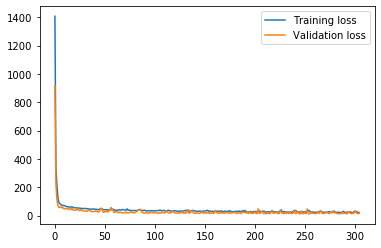

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [19]:
# Mean Squared Error (MSE) test data
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

27.9035312504048

In [32]:
# Mean Absolute Error (MAE) test data
mae = np.mean(np.abs(y_test-y_pred[0]))
mae

13.478367614746093

In [33]:
hasil = pd.DataFrame(y_test, columns = ["PRICE"])
hasil["PRICE_hat"] = y_pred
hasil

,PRICE,PRICE_hat
307,28.2,34.300106
343,23.9,28.871822
47,16.6,19.088762
67,22.0,24.353037
362,20.8,27.838078
...,...,...
467,19.1,18.260939
95,28.4,23.951923
122,20.5,20.435789
260,33.8,31.118538
